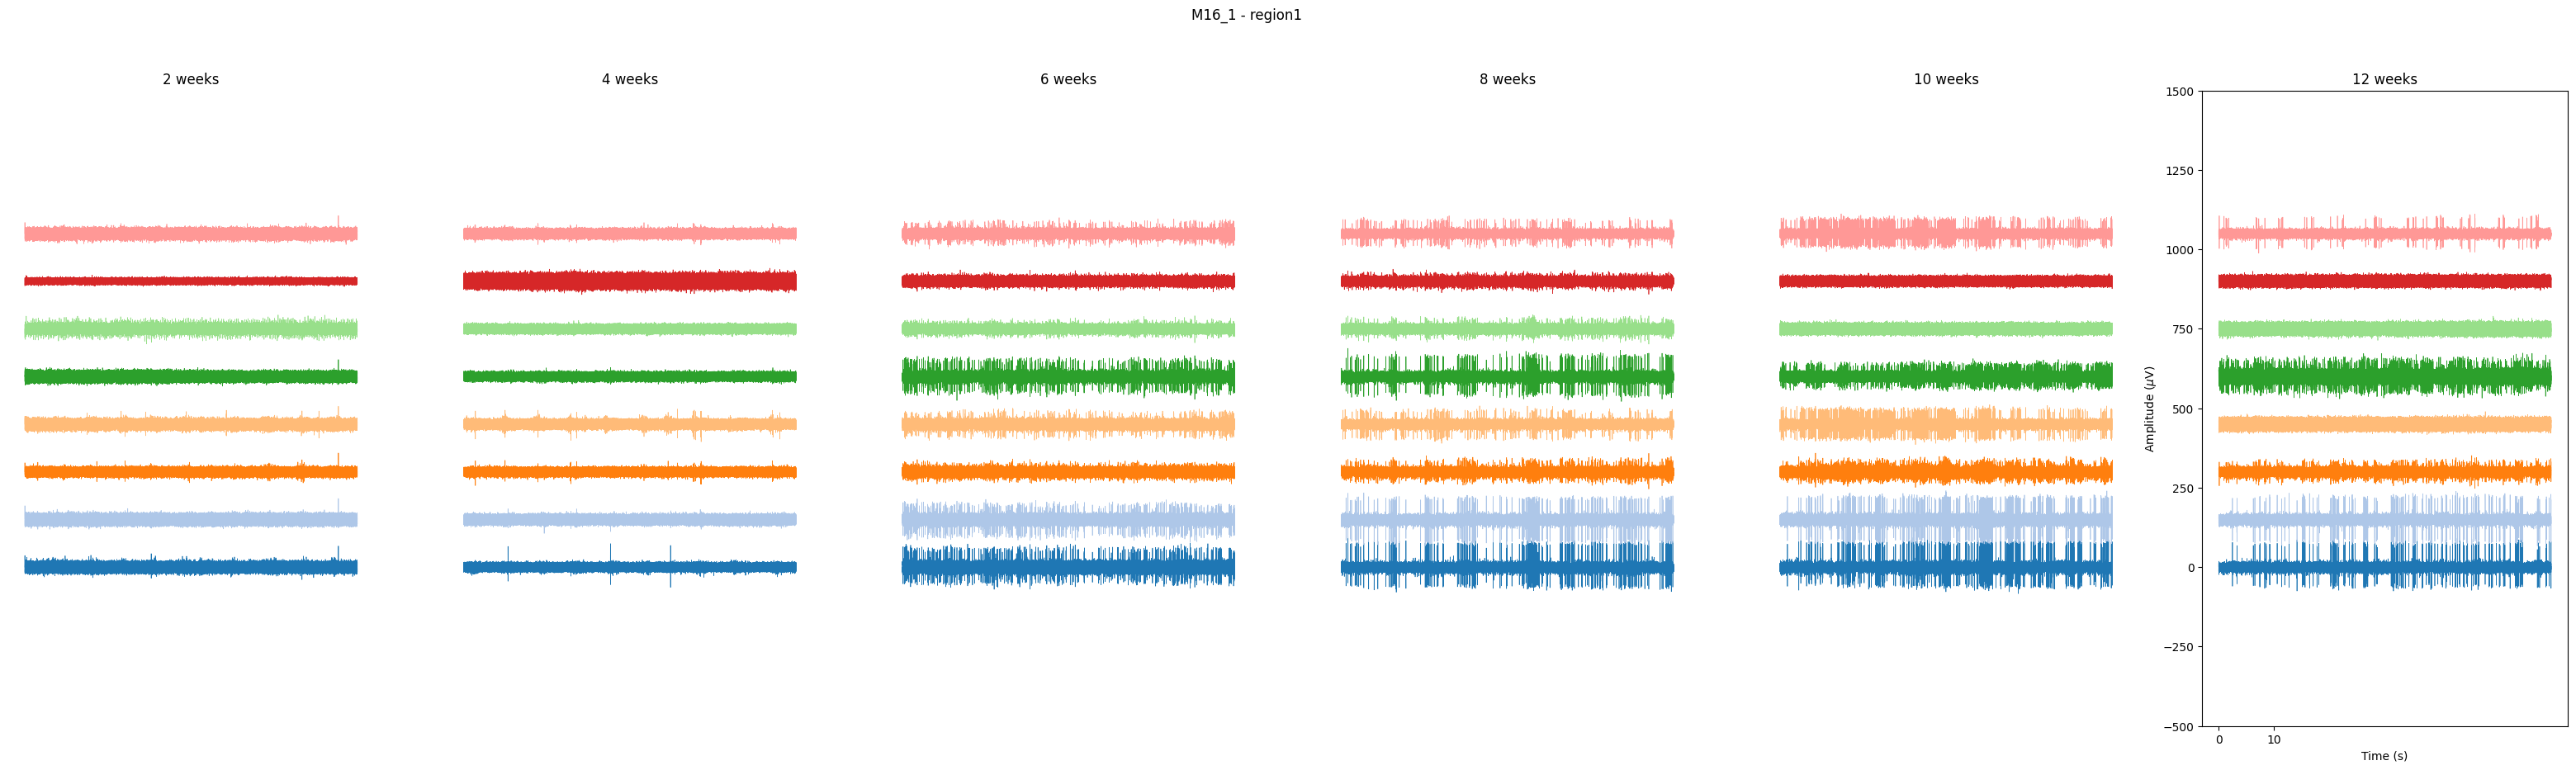

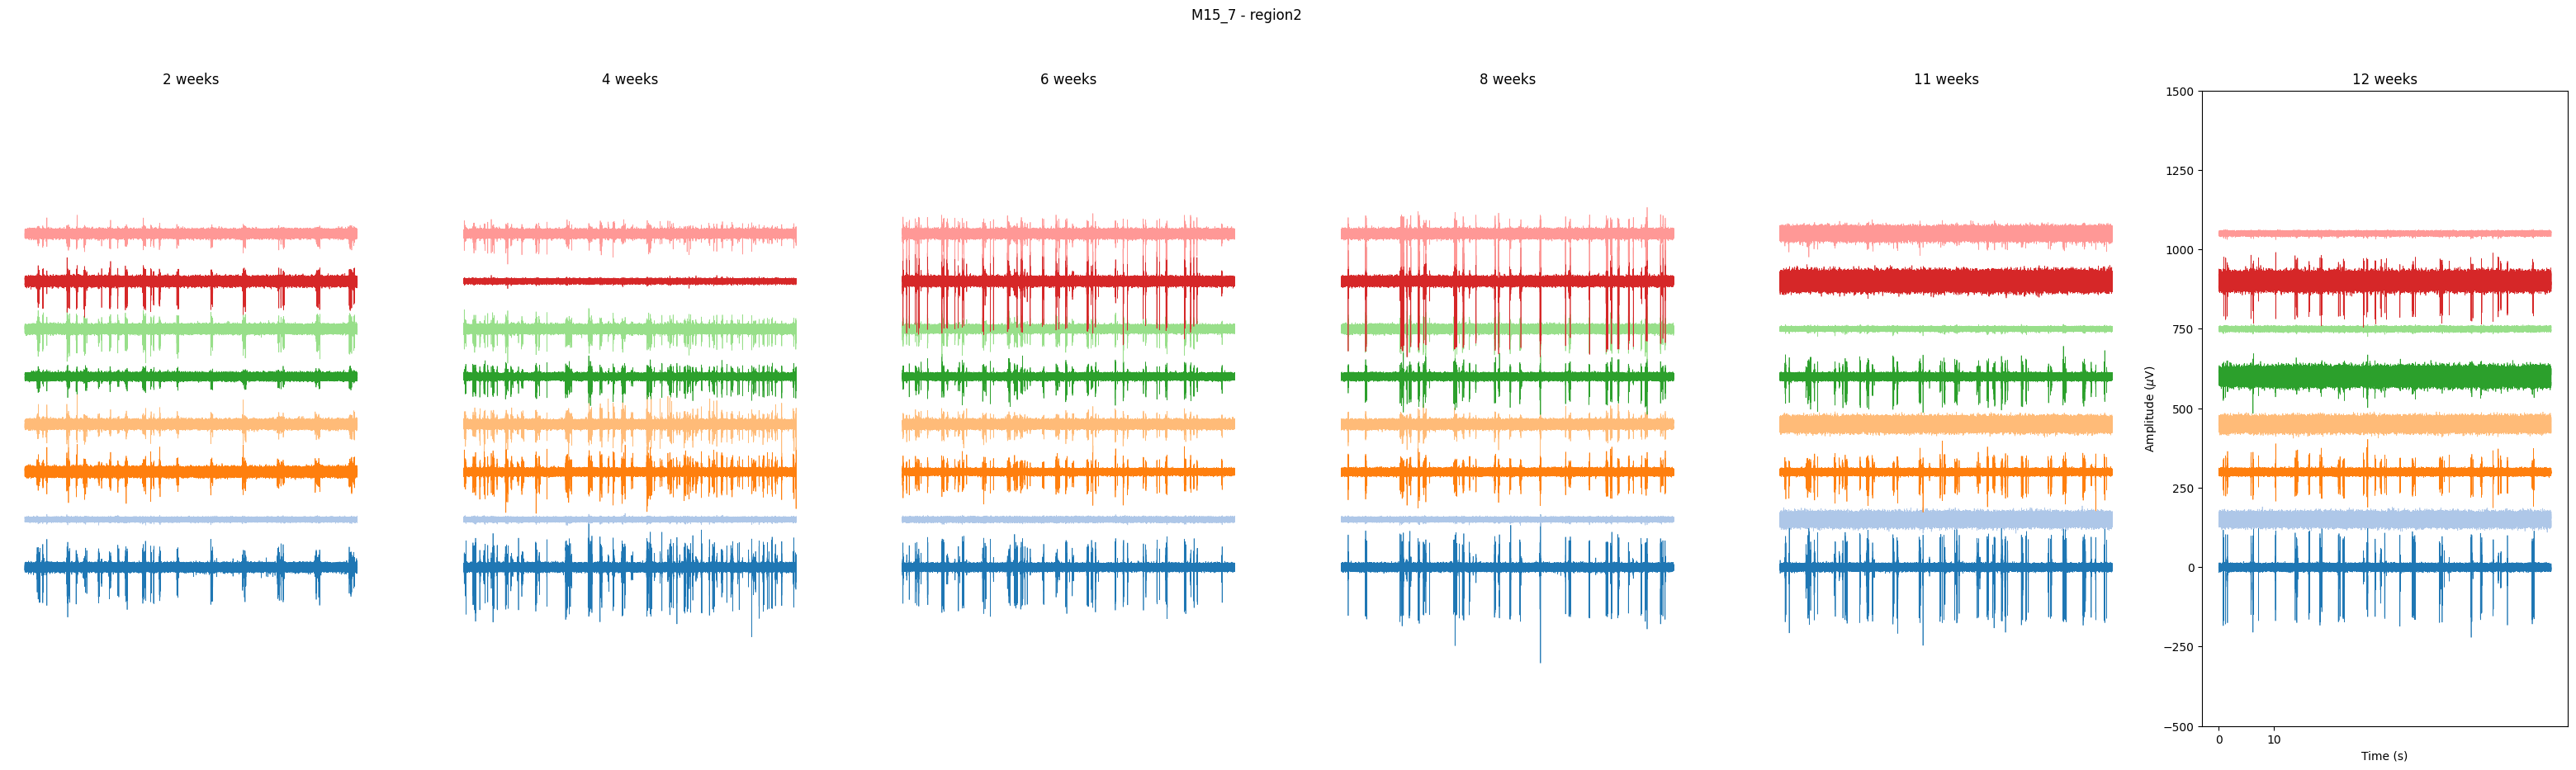

,recording_path,sampling_frequency,recording_start,recording_length,segment_path,segment_start,segment_length
0,data/raw/M15_7/240402/M15_7_240402_150753/M15_...,30000.0,0,1800064,data/raw/M15_7/240402/M15_7_240402_150753,0,36031232
1,data/raw/M15_7/240402/M15_7_240402_150753/M15_...,30000.0,1800064,1800064,data/raw/M15_7/240402/M15_7_240402_150753,0,36031232
2,data/raw/M15_7/240402/M15_7_240402_150753/M15_...,30000.0,3600128,1800064,data/raw/M15_7/240402/M15_7_240402_150753,0,36031232
3,data/raw/M15_7/240402/M15_7_240402_150753/M15_...,30000.0,5400192,1800064,data/raw/M15_7/240402/M15_7_240402_150753,0,36031232
4,data/raw/M15_7/240402/M15_7_240402_150753/M15_...,30000.0,7200256,1800064,data/raw/M15_7/240402/M15_7_240402_150753,0,36031232
...,...,...,...,...,...,...,...
166,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,30000.0,27000960,1800064,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,261283840,36000512
167,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,30000.0,28801024,1800064,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,261283840,36000512
168,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,30000.0,30601088,1800064,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,261283840,36000512
169,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,30000.0,32401152,1800064,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,261283840,36000512


In [17]:
import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd 
import spikeinterface.core as sc
import spikeinterface.extractors as se
import sys 

sys.path.append('src')

from src.facts import *
from src.multiregion_80pin_channels import *

figure_folder = 'figures/multiregion'
os.makedirs(figure_folder, exist_ok=True)

representative_subjects = {
    'region1': (
        'M16_1', 
        # 1,
        # {
        #     0: (10.6, 11.6), # w2
        #     1: (0, 1), # w4
        #     2: (6.5, 7.5), # w6
        #     3: (16, 17), # w8
        #     5: (16, 17), # w10
        #     7: (3, 4), # w12
        # },
        0,
        {
            0: (0, 1),
            1: (2.8, 3.8),
            2: (15, 16),
            3: (4, 5),
            # 4: (2, 3),
            5: (3, 4),
            # 6: (2, 3),
            7: (3.3, 4.3),
        },
        ),
    'region2': (
        'M15_7', 
        2,
        {
            0: (2.2, 3.2), # w2
            1: (3, 4), # w4
            2: (9, 10), # w6
            3: (18, 19), # w8
            6: (11, 12), # w10
            7: (14, 15), # w12
        },
        # 'M10_6',
        # 0,
        # {
        #     # 0: (1, 2), 
        #     1: (9, 10), # w2
        #     # 2: (12.5, 13.5), 
        #     3: (1, 2), # w4
        #     4: (12, 13), # w6
        #     5: (18.1, 19.1), # w7
        #     # 6: (8, 9),
        #     7: (15, 16), # w11
        #     8: (1, 2), # w12
        #     # 9: (4, 5),
        #     # 10: (18.5, 19.5),
        # }
        ),
}

colors = ['#9f4854',
 '#b34a59',
 '#be5665',
 '#c86371',
 '#d1707e',
 '#da7f8c',
 '#df8692',
 '#e48d9a']
trace_gap = 150

for region, (subject, shank, slices) in representative_subjects.items():
    session_info = pd.read_csv(f'data/processed/{subject}/all/session_info.csv')
    n_segment = len(session_info['segment_path'].unique())

    recording_dates = [datetime.datetime.strptime(path.split('/')[3], '%y%m%d') for path in session_info['segment_path'].unique()]
    surgery_date = datetime.datetime.strptime(surgery_dates[subject], '%Y%m%d')

    time_lapses = [round((recording_date - surgery_date).days / n_day_per_week) for recording_date in recording_dates]

    recordings = [sc.load_extractor(f'data/processed/{subject}/all/{region}/recording/segment{segment_index}') for segment_index in range(n_segment)]

    fig = plt.figure(figsize=(40, 10))
    fig.suptitle(f'{subject} - {region}')
    for plot_index, (segment_index, (t_start, t_end)) in enumerate(slices.items()):
        ax = plt.subplot(1, len(slices), plot_index + 1)
        traces = recordings[segment_index].get_traces(
            start_frame=int(t_start*n_s_per_min*recordings[segment_index].sampling_frequency), 
            end_frame=int(t_end*n_s_per_min*recordings[segment_index].sampling_frequency)
        ).T[channel_indices[shank]]
        for trace_index, trace in enumerate(traces):
            # ax.plot(trace + trace_index * trace_gap, linewidth=0.5, color=colors[trace_index])
            ax.plot(trace + trace_index * trace_gap, linewidth=0.5, color=plt.cm.tab20(trace_index))
            ax.set_ylim(-500, 1500)
        ax.set_axis_off()
        ax.set_title(f'{time_lapses[segment_index]} weeks')
    ax.set_axis_on()
    ax.set_xticks([0, 10*recordings[0].sampling_frequency], [0, 10])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(r'Amplitude ($\mu$V)')
    plt.show()
session_info

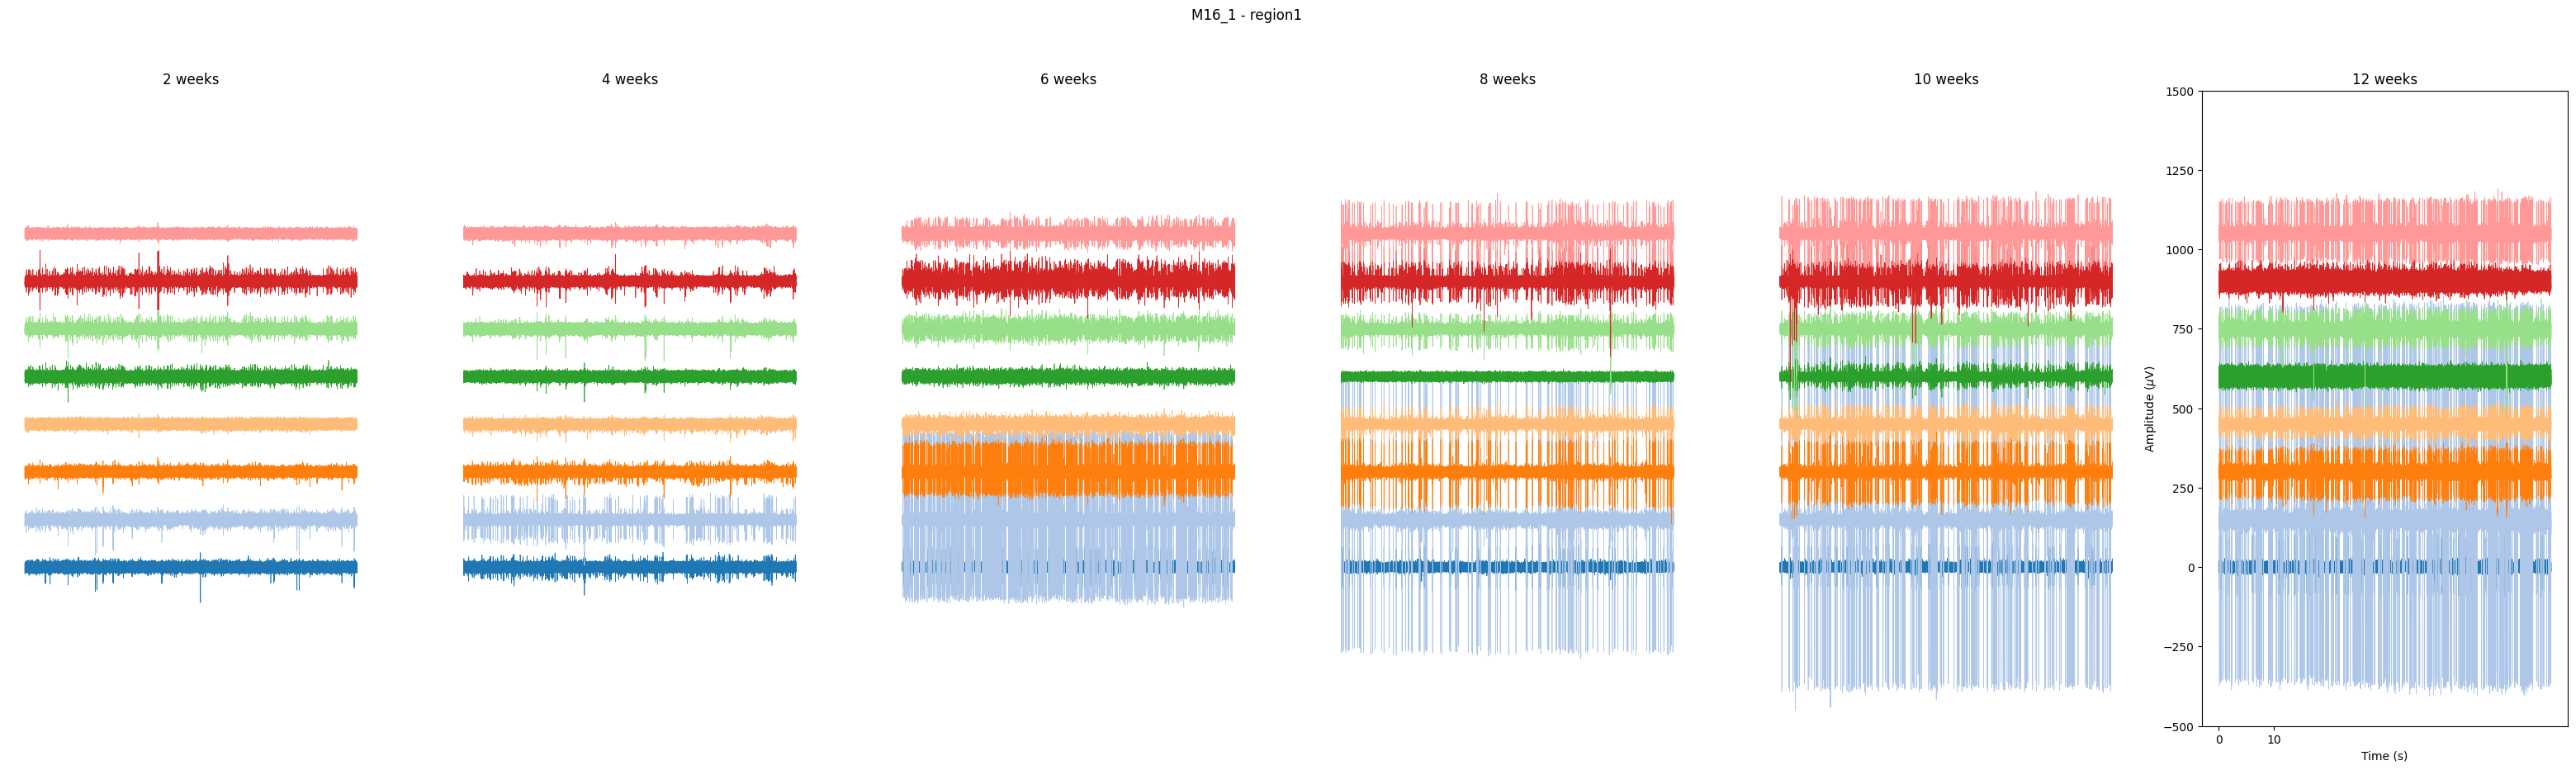

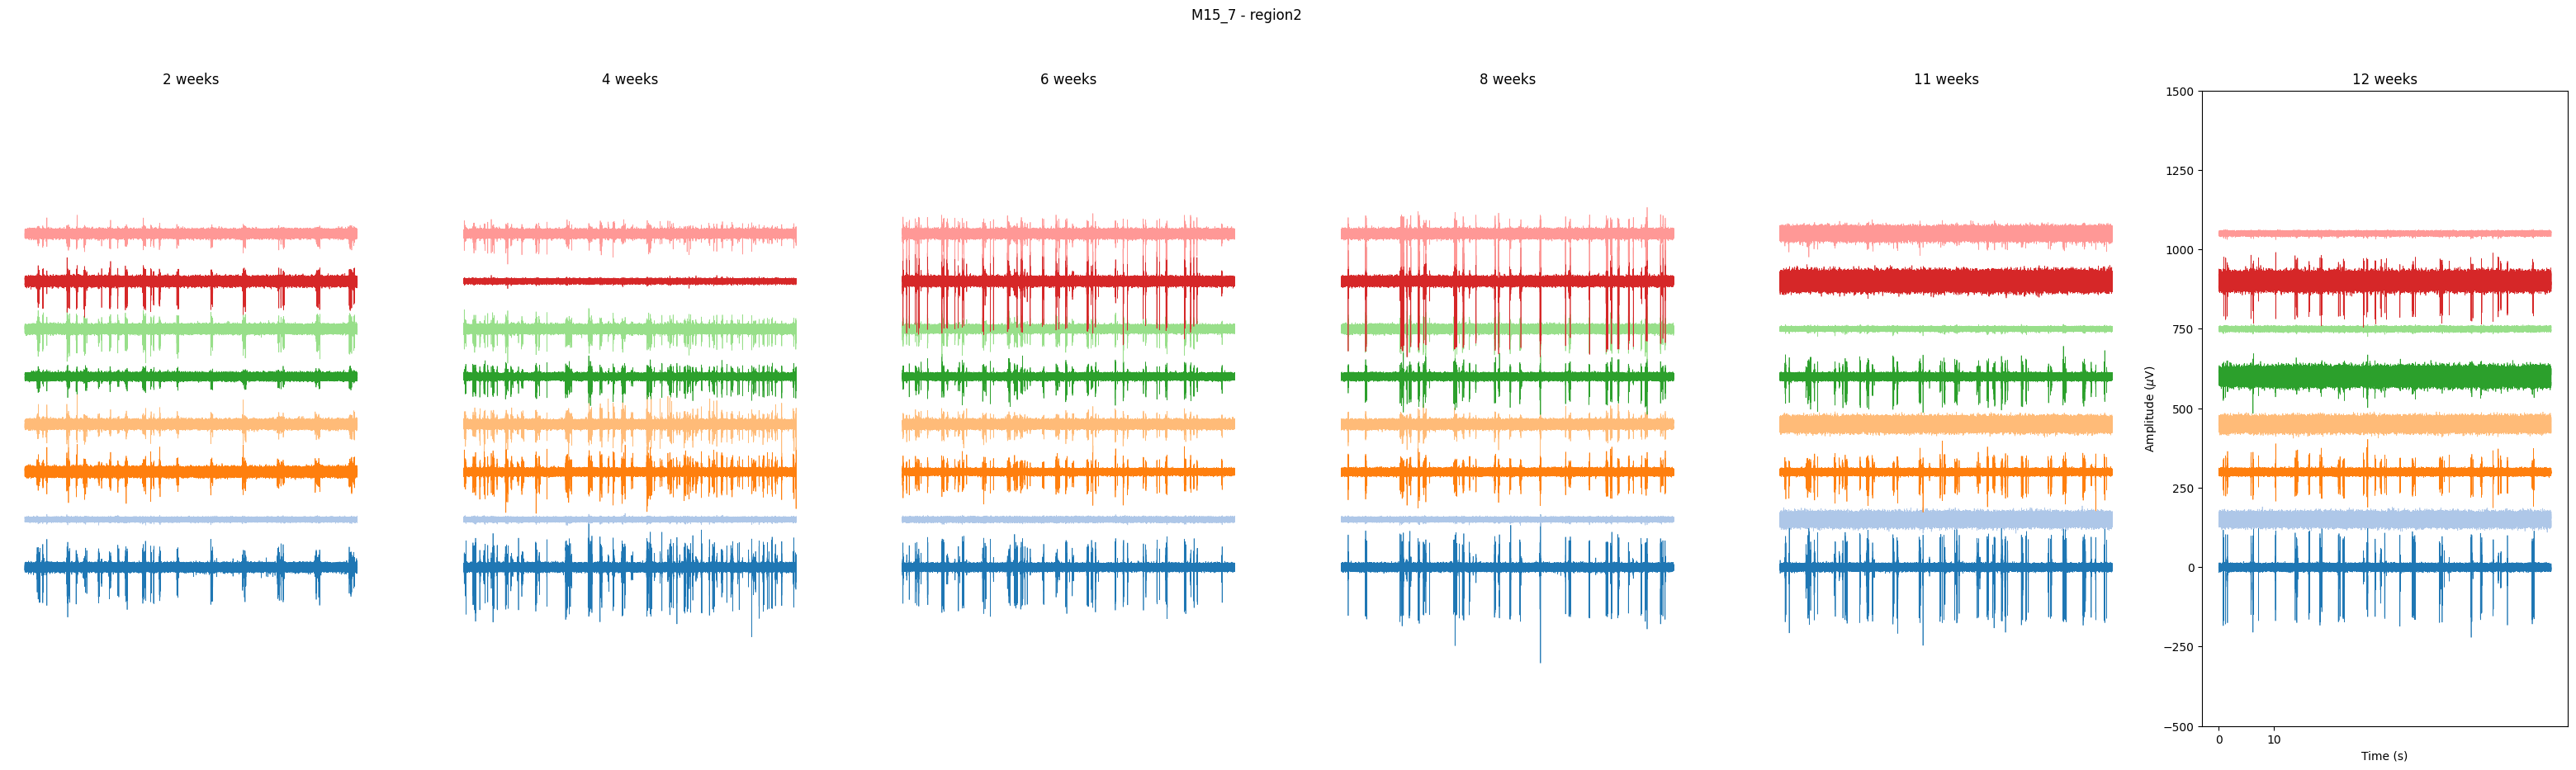

,recording_path,sampling_frequency,recording_start,recording_length,segment_path,segment_start,segment_length
0,data/raw/M15_7/240402/M15_7_240402_150753/M15_...,30000.0,0,1800064,data/raw/M15_7/240402/M15_7_240402_150753,0,36031232
1,data/raw/M15_7/240402/M15_7_240402_150753/M15_...,30000.0,1800064,1800064,data/raw/M15_7/240402/M15_7_240402_150753,0,36031232
2,data/raw/M15_7/240402/M15_7_240402_150753/M15_...,30000.0,3600128,1800064,data/raw/M15_7/240402/M15_7_240402_150753,0,36031232
3,data/raw/M15_7/240402/M15_7_240402_150753/M15_...,30000.0,5400192,1800064,data/raw/M15_7/240402/M15_7_240402_150753,0,36031232
4,data/raw/M15_7/240402/M15_7_240402_150753/M15_...,30000.0,7200256,1800064,data/raw/M15_7/240402/M15_7_240402_150753,0,36031232
...,...,...,...,...,...,...,...
166,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,30000.0,27000960,1800064,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,261283840,36000512
167,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,30000.0,28801024,1800064,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,261283840,36000512
168,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,30000.0,30601088,1800064,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,261283840,36000512
169,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,30000.0,32401152,1800064,data/raw/M15_7/240609/M15_7_240609_1610pm_2406...,261283840,36000512


In [15]:
import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd 
import spikeinterface.core as sc
import spikeinterface.extractors as se
import sys 

sys.path.append('src')

from src.facts import *
from src.multiregion_80pin_channels import *

figure_folder = 'figures/multiregion'
os.makedirs(figure_folder, exist_ok=True)

representative_subjects = {
    'region1': (
        'M16_1', 
        1,
        {
            0: (10.6, 11.6), # w2
            1: (0, 1), # w4
            2: (6.5, 7.5), # w6
            3: (16, 17), # w8
            5: (16, 17), # w10
            7: (3, 4), # w12
        },
        ),
    'region2': (
        'M15_7', 
        2,
        {
            0: (2.2, 3.2), # w2
            1: (3, 4), # w4
            2: (9, 10), # w6
            3: (18, 19), # w8
            6: (11, 12), # w10
            7: (14, 15), # w12
        },
        # 'M10_6',
        # 0,
        # {
        #     # 0: (1, 2), 
        #     1: (9, 10), # w2
        #     # 2: (12.5, 13.5), 
        #     3: (1, 2), # w4
        #     4: (12, 13), # w6
        #     5: (18.1, 19.1), # w7
        #     # 6: (8, 9),
        #     7: (15, 16), # w11
        #     8: (1, 2), # w12
        #     # 9: (4, 5),
        #     # 10: (18.5, 19.5),
        # }
        ),
}

colors = ['#9f4854',
 '#b34a59',
 '#be5665',
 '#c86371',
 '#d1707e',
 '#da7f8c',
 '#df8692',
 '#e48d9a']
trace_gap = 150

for region, (subject, shank, slices) in representative_subjects.items():
    session_info = pd.read_csv(f'data/processed/{subject}/all/session_info.csv')
    n_segment = len(session_info['segment_path'].unique())

    recording_dates = [datetime.datetime.strptime(path.split('/')[3], '%y%m%d') for path in session_info['segment_path'].unique()]
    surgery_date = datetime.datetime.strptime(surgery_dates[subject], '%Y%m%d')

    time_lapses = [round((recording_date - surgery_date).days / n_day_per_week) for recording_date in recording_dates]

    recordings = [sc.load_extractor(f'data/processed/{subject}/all/{region}/recording/segment{segment_index}') for segment_index in range(n_segment)]

    fig = plt.figure(figsize=(40, 10))
    fig.suptitle(f'{subject} - {region}')
    for plot_index, (segment_index, (t_start, t_end)) in enumerate(slices.items()):
        ax = plt.subplot(1, len(slices), plot_index + 1)
        traces = recordings[segment_index].get_traces(
            start_frame=int(t_start*n_s_per_min*recordings[segment_index].sampling_frequency), 
            end_frame=int(t_end*n_s_per_min*recordings[segment_index].sampling_frequency)
        ).T[channel_indices[shank]]
        for trace_index, trace in enumerate(traces):
            # ax.plot(trace + trace_index * trace_gap, linewidth=0.5, color=colors[trace_index])
            ax.plot(trace + trace_index * trace_gap, linewidth=0.5, color=plt.cm.tab20(trace_index))
            ax.set_ylim(-500, 1500)
        ax.set_axis_off()
        ax.set_title(f'{time_lapses[segment_index]} weeks')
    ax.set_axis_on()
    ax.set_xticks([0, 10*recordings[0].sampling_frequency], [0, 10])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(r'Amplitude ($\mu$V)')
    plt.show()
session_info